# Company Data(Random forest)

In [23]:
## importing laibaries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
## loading the data set
df=pd.read_csv('Company_data.csv')

In [9]:
## checking data
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
## checking shape of the data
df.shape

(400, 11)

In [11]:
## Checking for null values
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

## converting catagorical data into numerical

In [12]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['ShelveLoc']=label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']=label_encoder.fit_transform(df['Urban'])
df['US']=label_encoder.fit_transform(df['US'])

In [13]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [14]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


## Graphical representation

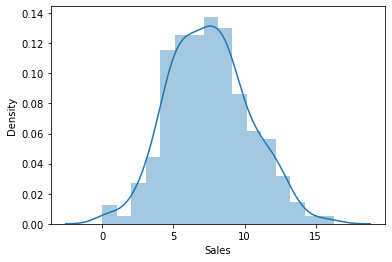

In [26]:
sns.distplot(df['Sales'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

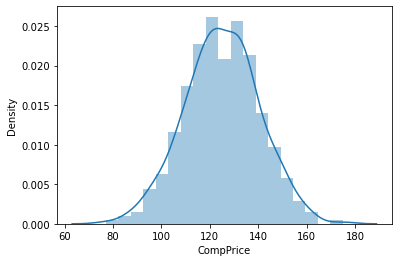

In [27]:
sns.distplot(df['CompPrice'])

<AxesSubplot:xlabel='CompPrice'>

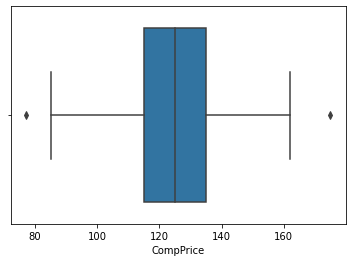

In [28]:
sns.boxplot(df['CompPrice'])

<AxesSubplot:xlabel='Income', ylabel='Density'>

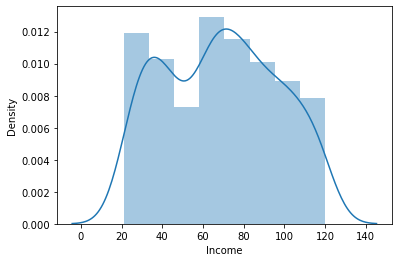

In [29]:
sns.distplot(df['Income'])

<AxesSubplot:xlabel='Advertising', ylabel='Density'>

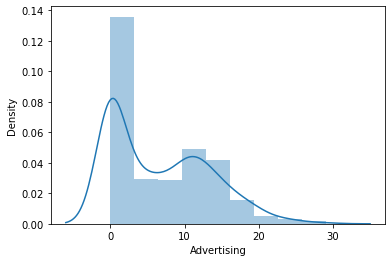

In [30]:
sns.distplot(df['Advertising'])

<AxesSubplot:xlabel='Population', ylabel='Density'>

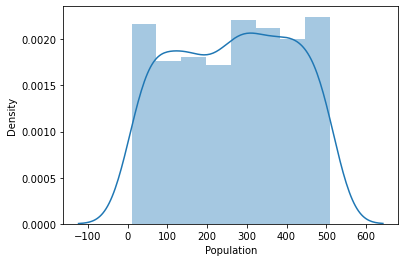

In [31]:
sns.distplot(df['Population'])

<AxesSubplot:xlabel='Population'>

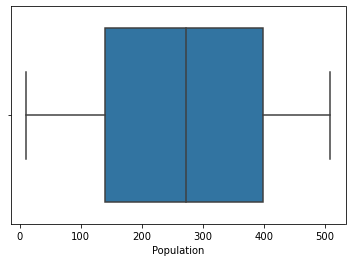

In [32]:
sns.boxplot(df['Population'])

<AxesSubplot:xlabel='Price', ylabel='Density'>

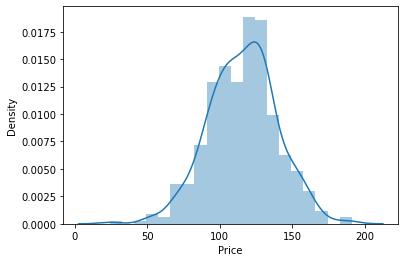

In [33]:
sns.distplot(df['Price'])

<AxesSubplot:xlabel='Urban', ylabel='count'>

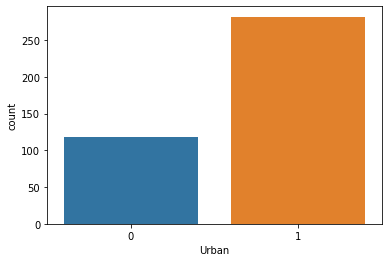

In [34]:
sns.countplot(df['Urban'])

<AxesSubplot:xlabel='US', ylabel='count'>

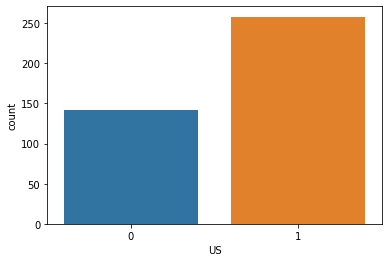

In [35]:
sns.countplot(df['US'])

## All data looking normally distributed

## spliting our data into target & features

In [15]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

## Building of the model Random Forest

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [17]:
## Fitting the model
kfold = KFold(n_splits=8, random_state=None)
model =RandomForestRegressor(n_estimators=70, max_features='auto',criterion='mse')
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.6936005375622263


## so accuracy of our model is 0.69 this is optimum accuracy at significant paramters.

# Random forest classification

## Checking wether the store in urban or rural location

In [20]:
X=df.drop(['Urban'],axis=1)
Y=df['Urban']

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## Model building

In [22]:
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(n_estimators=100, max_features="auto")
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.6675
